#### Torchvison 제공 Image 전처리 관련 기능
- torchvision.transforms 서브 Module
    * Image 크기 조절
    * Image 정규화
    * Image 자르기
    * Image 회전 등 다양한 기능 제공
    * Image Data type => Pillow Image

In [1]:
%pip install pillow

Note: you may need to restart the kernel to use updated packages.


- Module Loading 및 Data 설정 <hr>

In [19]:
import cv2                                      # ==> Image Data(raw data의 형식) => ndarray
from PIL import Image                           # %pip install pillow => Data를 읽으면 Image Data(raw data의 형식)의 형식이 JpegImage
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms            # pytorch 지원 Image 변환 관련 모듈
import torch

In [11]:
# Data 관련 설정
IMG_PATH = "../image/"
IMG_FILE = IMG_PATH+"ping.png"

- openCV & pillow <hr>

In [12]:
cv_img = cv2.imread(IMG_FILE)                                   # 결과 ndarray => BGR
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)                # 색 배열 BGR을 RGB로 변경

pil_img = Image.open(IMG_FILE)

In [13]:
print(f"type(cv_img) : {type(cv_img)}")
print(f"type(pil_img) : {type(pil_img)}")

type(cv_img) : <class 'numpy.ndarray'>
type(pil_img) : <class 'PIL.PngImagePlugin.PngImageFile'>


- Ndarray -> Tensor <hr>

In [14]:
# 일반적인 Tensor 생성법  [H, W, 채널]
cvTensor1 = torch.tensor(cv_img)
print(f"cvTensor1 : {cvTensor1.shape}, {cvTensor1.ndim}D")

# 이미지용 Tensor 생성용 => 채널 수넛/위치 자동 설정 [채널, H, W]
cvTensor2 = transforms.ToTensor()(cv_img)
print(f"cvTensor2 : {cvTensor2.shape}, {cvTensor2.ndim}D")

cvTensor1 : torch.Size([728, 480, 3]), 3D
cvTensor2 : torch.Size([3, 728, 480]), 3D


In [15]:
# 일반적인 Tensor 사용 [H, W, 채널]
pilTensor1 = torch.tensor(np.array(pil_img))
print(f"pilTensor1 : {pilTensor1.shape}, {pilTensor1.ndim}D")

# Image용 Tensor 생성 => 채널 순서/위치 자동 [C, H, W]
pilTensor2 = transforms.ToTensor()(np.array(pil_img))
print(f"pilTensor2 : {pilTensor2.shape}, {pilTensor2.ndim}D")

# 2랑 똑같은 기능
pilTensor3 = transforms.PILToTensor()(pil_img)
print(f"pilTensor3 : {pilTensor3.shape}, {pilTensor3.ndim}D")

pilTensor1 : torch.Size([728, 480, 4]), 3D
pilTensor2 : torch.Size([4, 728, 480]), 3D
pilTensor3 : torch.Size([4, 728, 480]), 3D


cvNP : (728, 480, 3), 3D


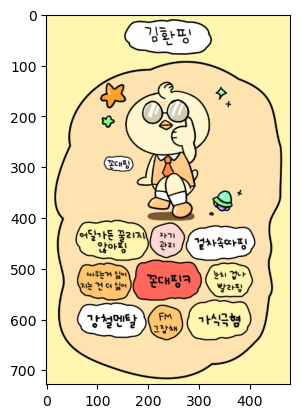

In [16]:
# 일반적인 Tensor로 값을 가져옴
cvNP = cvTensor1.numpy()
print(f"cvNP : {cvNP.shape}, {cvNP.ndim}D")

plt.imshow(cvNP)
plt.show()

- Tensor -> ndarray <hr>

cvNP : (728, 480, 3), 3D


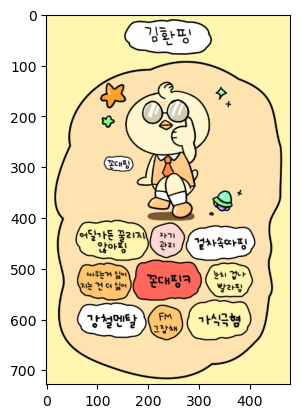

In [20]:
cvNP = cvTensor1.numpy()
print(f'cvNP : {cvNP.shape}, {cvNP.ndim}D')
plt.imshow(cvNP)
plt.show()

In [23]:
from torchvision.transforms import v2

v2.ToImage()(cv_img)
type(v2.ToImage()(cv_img))

torchvision.tv_tensors._image.Image

- Tensor -> PIL Image

In [24]:
# 창으로 띄어줌

pilIMG1 = transforms.ToPILImage()(pilTensor2)
print(f"pilIMG1 : {pilIMG1.width}, {pilIMG1.height}, {pilIMG1.mode}")
pilIMG1.show()

pilIMG1 : 480, 728, RGBA


In [25]:
# Tensor 안에 ndarray
# cv2 안에 ndarray
# pillow는 image 객체 타입  <=> ndarray는 서로 변환할때 함수를 사용해야함